<a href="https://colab.research.google.com/github/ashirwadsangwan/Python/blob/master/PyTorch/01_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
from torchvision import datasets, transforms
from matplotlib import pyplot as plt

In [0]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
                               ])

In [3]:
trainset = datasets.MNIST("MNIST_data/", download=True, train = True, transform = transform)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

0it [00:00, ?it/s]

9920512it [00:01, 8464311.90it/s]                            


Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz


  0%|          | 0/28881 [00:00<?, ?it/s]

32768it [00:00, 134499.73it/s]           
  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:00, 2211909.62it/s]                            
0it [00:00, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 50679.72it/s]            


Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [0]:
data_iter = iter(train_loader)
images, labels = data_iter.next()

In [5]:
images.shape

torch.Size([64, 1, 28, 28])

In [6]:
labels.shape

torch.Size([64])

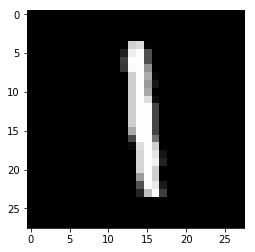

In [7]:
plt.imshow(images[1].numpy().squeeze(), cmap="Greys_r");

In [0]:
def activation(x):
    
    '''
    This is Sigmoid activation function.
    
    Input : Tensor
    '''
    return 1/(1 + torch.exp(-x))

In [0]:
# flatten the input images
inputs = images.view(images.shape[0],-1)

# create parameters

w1 = torch.randn(784, 256)
b1 = torch.randn(256)

w2 = torch.randn(256, 10)
b2 = torch.randn(10)

hidden = activation(torch.mm(inputs, w1) + b1)
out = torch.mm(hidden, w2) + b2

In [10]:
print(out)

tensor([[ 8.2782e+00, -1.0481e+01,  3.7454e-01, -7.1249e+00,  1.2700e+01,
         -6.1765e-01, -5.4672e+00,  1.5207e+01, -9.6884e+00,  8.5280e+00],
        [ 6.3777e+00, -1.1625e+00, -8.2598e+00, -9.8269e+00,  8.6550e+00,
          3.5632e+00, -1.3105e+01,  5.2419e+00, -3.1416e+00,  6.2755e+00],
        [ 1.9395e+01, -5.0900e+00, -4.0506e+00, -7.0152e+00,  1.9238e+01,
         -2.1924e-01, -1.2922e+01,  6.5586e+00,  4.8023e+00,  5.6764e-01],
        [ 1.0499e+01, -7.8110e+00, -1.5477e+01, -9.8409e+00,  6.9289e+00,
         -3.8658e-01, -1.3892e+01,  6.9636e+00, -1.4090e+01,  1.6060e+00],
        [ 8.1689e+00, -1.0380e+00, -5.5181e+00, -3.6431e+00,  7.7968e+00,
          9.2228e-01, -1.6290e+01,  7.8133e+00, -5.9124e+00,  1.3203e+01],
        [ 1.5446e+01, -9.8828e+00, -1.4408e+00, -1.0210e+01,  1.3462e+01,
         -9.1376e+00, -1.3455e+01,  7.7150e+00, -2.6062e+00,  7.9999e+00],
        [ 1.3640e+01, -6.4614e+00, -4.0424e+00, -1.4608e+01,  2.0035e+01,
         -7.0210e+00, -1.9482e+0

In [11]:
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1, 1)

probs = softmax(out)

print(probs.shape)
print(probs.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


In [0]:
from torch import nn

In [0]:
class Network(nn.Module):
    
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer linear transformation.
        
        self.hidden = nn.Linear(784, 256)
        
        #output Layers
        
        self.output = nn.Linear(256, 10)
        
        # sigmoid and softmax
        
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
        
    def forward(self):
        
        # pass the input tensor through each of our operations
        
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [14]:
model = Network()
print(model)

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax()
)


In [0]:
class Network(nn.Module):
    
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer linear transformation.
        
        self.hidden = nn.Linear(784, 256)
        
        #output Layers
        
        self.output = nn.Linear(256, 10)
        
        # sigmoid and softmax
        
        self.sigmoid = nn.Sigmoid()
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)
        
        
    def forward(self):
        
        # pass the input tensor through each of our operations
        
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [22]:
model = Network()
print(model)

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (relu): ReLU()
  (softmax): Softmax()
)
